# Convolution Intuition Building

Still todo:
- test other stranger functions in the convolution integral function such as the delta function sin approximation 
- have an analytical calcuation of the convolution integral for these functions to verify shape
- clean up the rest of the cells and compare each of the cases above to the discrete case
- watch 3 blue 1 brown convolution video & solve ~3 problems from math methods above convolutions 
- try and finally build intuition for what the heck this thing is precisely doing


Module imports

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from sympy import *

### (Apparently..?) Two different mathematical representations of the convolution.

In [2]:
def convolution(f, g, x):
    """
    f, g -> taken to be functions
    x -> range over which f and g are to be
        evaluated over

    The typical convolution integral expressed as a Riemann summation.
    """
    dy = x[1] - x[0]

    res_tot = np.zeros(len(x))
    for i, xv in enumerate((x)):
        # print(i, xv)
        res = 0
        for j, yv in enumerate((x)):
            # print(j, yv)
            val = (1/(2*np.pi))*(g(yv)*f(xv - yv))
            # print(val)
            res += val*dy
            # print(res)
        res_tot[i] = res
    return res_tot

def discrete_convolution(f_vals, g_vals):
    """
    f, g -> taken to be discrete 1d arrays 
    
    Dicrete vector convolution over indexes.
    """

    M = len(f_vals)
    N = len(g_vals)

    result = np.zeros(M + N - 1)

    for n in range(M + N - 1):
        res = 0
        for m in range(N):
            if 0 <= n-m < M:
                val = f_vals[m]*g_vals[n - m]
                # print(val)
                res += val
                # print(res)
        result[n] = res
    return result

### Function list

List of functions to perform convolutions with.

In [34]:
def f(x):
    return 5*x

def k(x):
    return x**3

def h(x):
    return 3*np.ones_like(x)

def g(x):
    return 25*np.exp(-x**2/0.5)

def y(x):
    gamma = 1.0
    x0 = 0.0
    return  (1 / np.pi) * (0.5 * gamma) / ((x - x0)**2 + (0.5 * gamma)**2)

def a(x):
    return np.exp(-x)

def b(x):
    return np.exp((x))

### Convolutions

For the first test, we compute the convolution integral for a variety of the above function pairs.

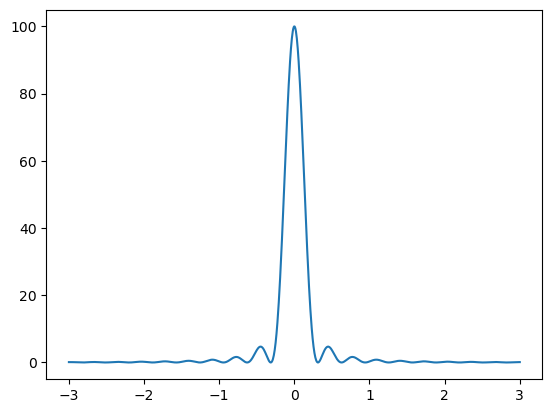

In [35]:
def sinx(x):
    return np.sin(x/0.1)**2/x**2

xv = np.linspace(-3, 3, 1000)

plt.plot(xv, sinx(xv))

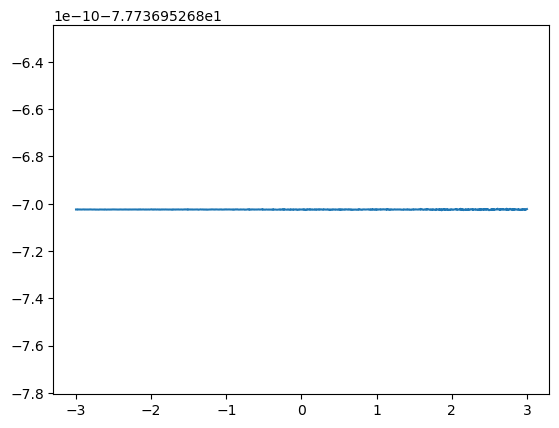

In [36]:
f_sin = convolution(f, k, xv)
# print(f_sin)
plt.plot(xv, f_sin)

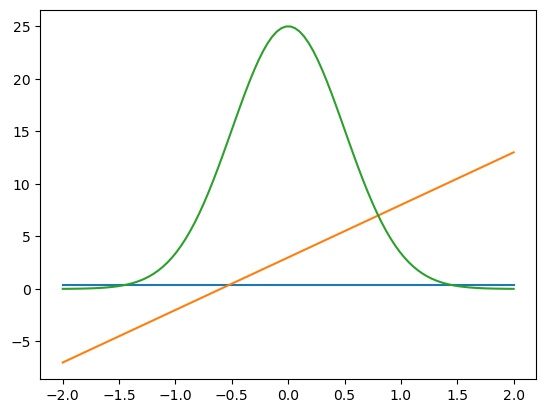

In [6]:
xvals = np.linspace(-2, 2, 100)
f_g = convolution(h, y, xvals)

plt.plot(xvals, f_g)
plt.plot(xvals, f(xvals))
plt.plot(xvals, g(xvals))



In [7]:
x, y, o = symbols('x y o')

integrate(exp(-y**2 + 2*x*y), (x, -2, 2))

Piecewise((-exp(-y**2 - 4*y)/(2*y) + exp(-y**2 + 4*y)/(2*y), (y > -oo) & (y < oo) & Ne(y, 0)), (4, True))

In [8]:
integrate((5*y + 3)*(exp(-(x-y**2/o))), (y, -oo, oo))

Piecewise((-3*I*sqrt(pi)*o*exp(-x)/sqrt(polar_lift(o)), (Abs(arg(o) - pi) <= pi/2) & (Abs(arg(o) - pi) < pi/2)), (Integral((5*y + 3)*exp(-x + y**2/o), (y, -oo, oo)), True))

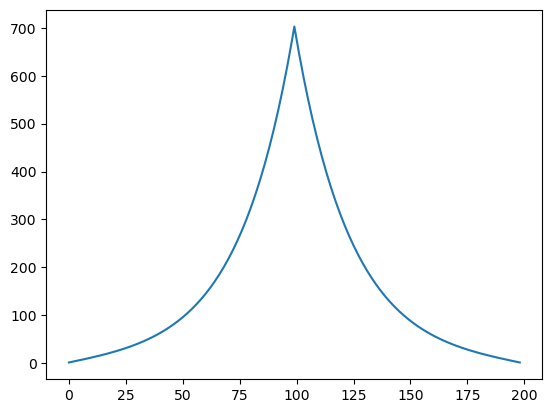

In [9]:
xvs = np.linspace(-2, 2, 100)
# new_xvs = np.linspace()


conv = convolution(a, b, xvs)
discrete_conv = discrete_convolution(a(xvs), b(xvs))
conv_np = np.convolve(a(xvs), b(xvs))
# plt.plot(xvs, conv)
plt.plot(conv_np)
# plt.plot(discrete_conv)

# plt.plot(xvs, a(xvs))
# plt.plot(xvs, b(xvs))

In [10]:
result = convolution(f, g, xvals)
print(result)

[-34.90559561 -33.89821911 -32.89084262 -31.88346612 -30.87608962
 -29.86871313 -28.86133663 -27.85396013 -26.84658364 -25.83920714
 -24.83183064 -23.82445415 -22.81707765 -21.80970115 -20.80232466
 -19.79494816 -18.78757166 -17.78019517 -16.77281867 -15.76544217
 -14.75806568 -13.75068918 -12.74331268 -11.73593619 -10.72855969
  -9.72118319  -8.7138067   -7.7064302   -6.6990537   -5.69167721
  -4.68430071  -3.67692421  -2.66954772  -1.66217122  -0.65479472
   0.35258177   1.35995827   2.36733477   3.37471126   4.38208776
   5.38946426   6.39684075   7.40421725   8.41159375   9.41897024
  10.42634674  11.43372324  12.44109973  13.44847623  14.45585273
  15.46322922  16.47060572  17.47798222  18.48535871  19.49273521
  20.50011171  21.5074882   22.5148647   23.5222412   24.52961769
  25.53699419  26.54437069  27.55174718  28.55912368  29.56650018
  30.57387668  31.58125317  32.58862967  33.59600617  34.60338266
  35.61075916  36.61813566  37.62551215  38.63288865  39.64026515
  40.64764